# 超音波ガイド波実験の解析用コード

## 必要に応じて以下のライブラリを追加する

```pip install japanize-matplotlib``` <br>
```pip install PyWavelets```

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from matplotlib.ticker import MultipleLocator
from scipy.signal import butter, filtfilt
import os # ファイルパスを扱うためにosモジュールをインポート

In [ ]:
# --- ファイルの読み込み ---
filepath = './source/csv/250923実験分/貫通/単一コイル_HPFoff_200khz.csv'
df = pd.read_csv(filepath, encoding='cp932')
# df.head(10)
# df.columns

フィルタ適用後のデータを './source/csv/250923実験分/貫通/単一コイル_HPFoff_200khz_HPF.csv' に保存しました。


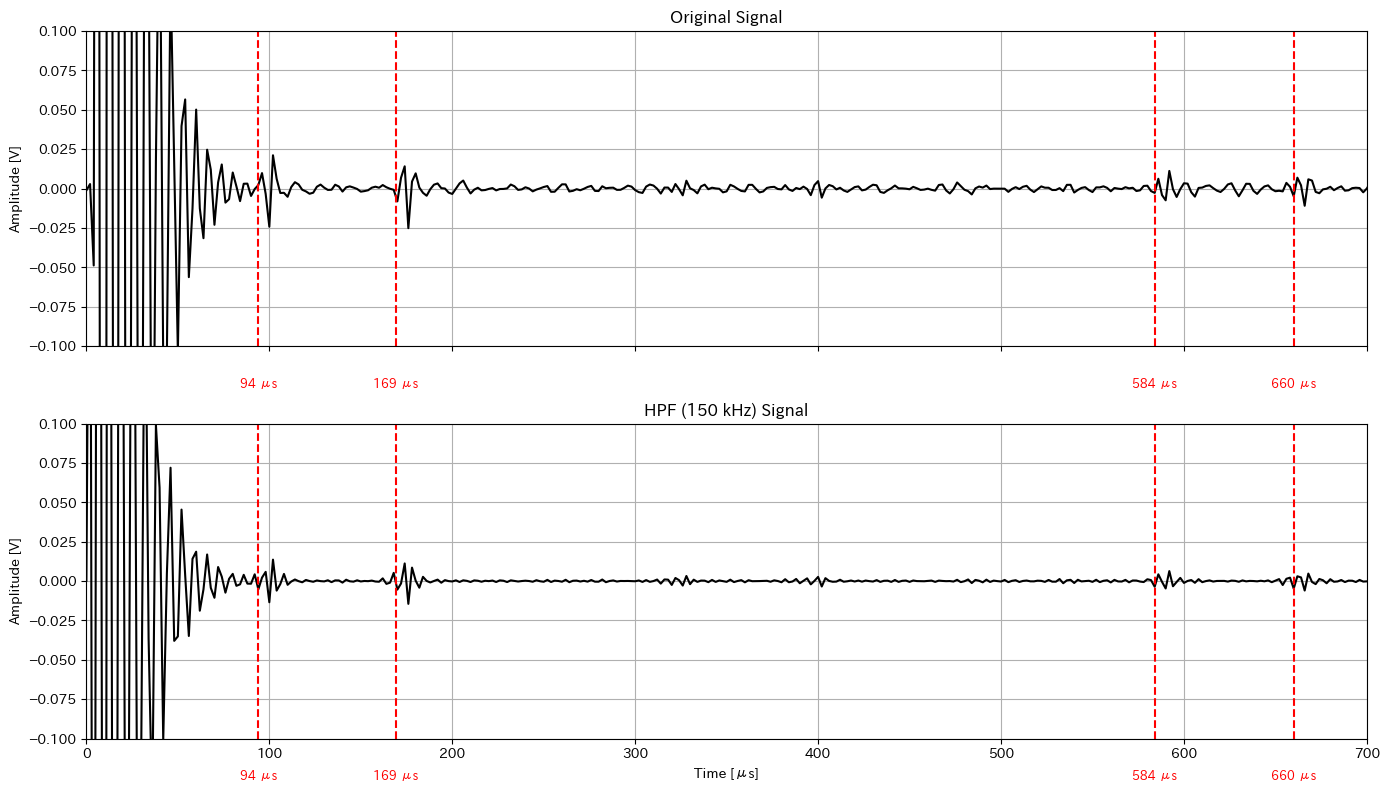

In [ ]:
original_signal = df[' 加算平均値[V]'].copy()

# --- HPFの設計と適用 ---
fs = 500e3
b, a = butter(N=4, Wn=150e3/(fs/2), btype='high')
filtered = filtfilt(b, a, df[' 加算平均値[V]'])

# 1. フィルタ適用後の値で指定のカラムを上書き
df[' 加算平均値[V]'] = filtered
df['使用したデータ[V]'] = filtered # '使用したデータ[V]' カラムも上書き

# 2. 新しいファイル名を生成
# 元のファイルパスを「名前」と「拡張子」に分割
base, ext = os.path.splitext(filepath)
# 名前の末尾に "_HPF" を追加して新しいファイルパスを作成
new_filepath = f"{base}_HPF{ext}"

# 3. 新しいCSVファイルとして出力
# index=False を指定して、行番号が出力されないようにする
df.to_csv(new_filepath, encoding='cp932', index=False)

print(f"フィルタ適用後のデータを '{new_filepath}' に保存しました。")

# 縦線の位置
x_lines = [94, 169, 584, 660]

# プロット（横長）
fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# 上段: 元信号 (保持しておいた original_signal を使用)
axes[0].plot(df['時間[μs]'], original_signal, color='black')
for x in x_lines:
    axes[0].axvline(x=x, color='r', linestyle='--')
    axes[0].text(x, -0.12, f"{x} μs", color='r',
                 ha='center', va='top', fontsize=9)
axes[0].set_title("Original Signal")
axes[0].set_ylabel("Amplitude [V]")
axes[0].grid(True)

# 下段: HPF適用後 (フィルタ適用後の filtered を使用)
axes[1].plot(df['時間[μs]'], filtered, color='black')
for x in x_lines:
    axes[1].axvline(x=x, color='r', linestyle='--')
    axes[1].text(x, -0.12, f"{x} μs", color='r',
                 ha='center', va='top', fontsize=9)
axes[1].set_title("HPF (150 kHz) Signal")
axes[1].set_xlabel("Time [μs]")
axes[1].set_ylabel("Amplitude [V]")
axes[1].grid(True)

# 共通設定
axes[0].set_xlim(0, 700)
axes[0].set_ylim(-0.1, 0.1)
axes[1].set_xlim(0, 700)
axes[1].set_ylim(-0.1, 0.1)

plt.tight_layout()
plt.show()